In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [3]:
symbolsDF = pd.read_pickle('../data/symbolsDF.pkl')
start, end = '2007-05-02', '2016-04-11'                        #variable here
datadir_name = '_'.join(('data', start, end))
datadir_path = ''.join(('../data/', datadir_name))

In [5]:
symbol = 'GS'

In [19]:
def get_returns(symbol, return_col = 'returns'):
    df = pd.read_pickle(''.join((datadir_path, '/', symbol, '.pkl')))
    if return_col not in symbolsDF.columns:
        df['daily_rets'] = (df['Adj Close'].shift(-1) - df['Adj Close']) / df['Adj Close']
        #df[return_col]= np.cumprod(df['daily_rets']*df.test +1)
        df[return_col]= df['daily_rets']*df.test
        df.to_pickle(''.join((datadir_path, '/', symbol, '.pkl')))
    return df

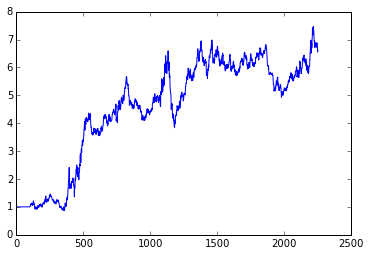

In [9]:
plot(df.returns)

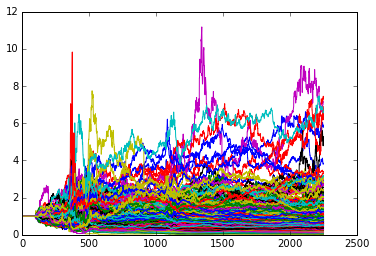

In [20]:
returnsDF = pd.DataFrame()
for symbol in symbolsDF[symbolsDF["smoothing_fns_logic"]==True].symbols:
    df = get_returns(symbol, return_col = 'returns')
    plot(np.cumprod(df.returns+1))
    returnsDF[symbol] =df.returns

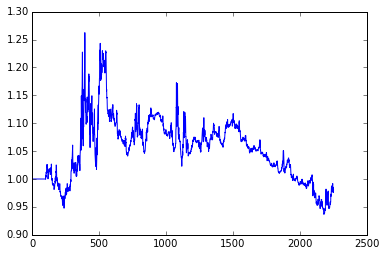

In [25]:
plot(np.cumprod(returnsDF.mean(axis=1)+1))